In [3]:
import pandas as pd

### show downloaded files

In [8]:
import os
arr = os.listdir('data')
arr

['14_bevoelkerungsvorausberechnung_daten.csv',
 'sonderauswertung-sterbefaelle-endgueltige-daten (1).xlsx',
 'sonderauswertung-sterbefaelle-endgueltige-daten (2).xlsx',
 'sonderauswertung-sterbefaelle-endgueltige-daten.xlsx']

In [11]:
bevoelkerungsvorausberechnung_df = pd.read_csv("data/14_bevoelkerungsvorausberechnung_daten.csv",delimiter=';')

In [22]:
cols = bevoelkerungsvorausberechnung_df.columns
bevoelkerungsvorausberechnung_df[cols[0:5]].loc[(bevoelkerungsvorausberechnung_df['Simulationsjahr'] < 2022) & (bevoelkerungsvorausberechnung_df['Simulationsjahr'] > 2010)]

,Variante,Simulationsjahr,mw,Bev,Bev_0_1
122,0,2011,m,39230,337
123,0,2011,w,41098,321
124,0,2012,m,39377,346
125,0,2012,w,41120,328
126,0,2013,m,39557,350
...,...,...,...,...,...
2323,27,2019,w,42145,384
2324,27,2020,m,41176,403
2325,27,2020,w,42232,383
2326,27,2021,m,41272,401


## Sterberate pro Altersgruppe 2016-2022

In [62]:
sterberate_16_22 = pd.read_excel('data/Sterberate pro Altersgruppe 2016-2022.xlsx','D_2016_2022_Tage')

In [63]:
sterberate_16_22.rename(columns = {'Stand: 02.05.2022':'year', 'Unnamed: 367':'Insgesamt'}, inplace = True)
df_16_22 = sterberate_16_22[['year','Insgesamt']][9:].sort_values('year')

## Sterberate pro Altersgruppe 2000-2016

In [64]:
sterberate_00_16 = pd.read_excel('data/Sterberate pro Altersgruppe 2000-2016.xlsx','D_2000_2015_Tage')

In [65]:
sterberate_00_16.rename(columns = {'Unnamed: 0':'year', 'Unnamed: 367':'Insgesamt'}, inplace = True)

In [66]:
df_00_16 = sterberate_00_16[['year','Insgesamt']][9:].sort_values('year')

In [67]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([df_00_16, df_16_22], axis=0)

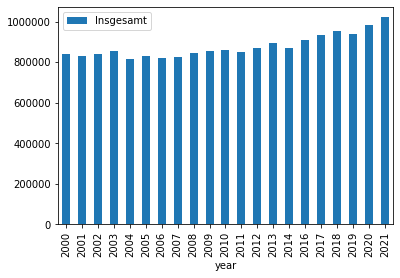

In [76]:
vertical_stack.plot(x='year',y='Insgesamt',kind='bar')